# <h> Question 1 </h>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from __future__ import absolute_import,division,print_function,unicode_literals
from tensorflow.keras import datasets,layers,models

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [4]:

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

In [5]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
print("w:", w.shape)
print("b:", b.shape)
print(y_train.shape)

w: (3072, 10)
b: (10,)
(50000, 10)


In [6]:
batch_size = Ntr
iterations =300
lr = 1.4e-2
lr_decay=0.9999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
print("Initial leatning rate" ,lr )

Initial leatning rate 0.014


In [7]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w)+b
    loss =1./batch_size *np.square(y_pred-y).sum()+reg*np.sum(w**2)
    loss_history.append(loss)
    if t%10 == 0:
        print('iteration %d / %d: loss %f'%(t,iterations,loss))
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    db = dy_pred.sum(axis=0)
    dw = x.T.dot(dy_pred)+reg*w
    w-=lr*dw
    b-=lr*db
    lr*=lr_decay

iteration 0 / 300: loss 1.000027
iteration 10 / 300: loss 0.876441
iteration 20 / 300: loss 0.842110
iteration 30 / 300: loss 0.823045
iteration 40 / 300: loss 0.811767
iteration 50 / 300: loss 0.804807
iteration 60 / 300: loss 0.800311
iteration 70 / 300: loss 0.797252
iteration 80 / 300: loss 0.795055
iteration 90 / 300: loss 0.793388
iteration 100 / 300: loss 0.792061
iteration 110 / 300: loss 0.790960
iteration 120 / 300: loss 0.790018
iteration 130 / 300: loss 0.789192
iteration 140 / 300: loss 0.788455
iteration 150 / 300: loss 0.787788
iteration 160 / 300: loss 0.787179
iteration 170 / 300: loss 0.786619
iteration 180 / 300: loss 0.786100
iteration 190 / 300: loss 0.785618
iteration 200 / 300: loss 0.785167
iteration 210 / 300: loss 0.784744
iteration 220 / 300: loss 0.784347
iteration 230 / 300: loss 0.783972
iteration 240 / 300: loss 0.783617
iteration 250 / 300: loss 0.783281
iteration 260 / 300: loss 0.782961
iteration 270 / 300: loss 0.782656
iteration 280 / 300: loss 0.782

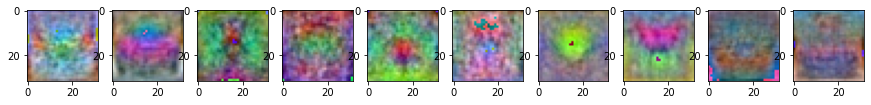

Training Loss: 0.7818474613024243


In [8]:
f,ax = plt.subplots(1,10)
f.set_size_inches(15,15)
for i in range(10):
    sample = w[:,i].reshape(32,32,3)
    correctd = 255/(sample.max()-sample.min())*sample+sample.min()*(255/(sample.max()-sample.min()))

    ax[i].imshow((correctd).astype(np.uint8))
plt.show()
print('Training Loss:',loss_history[-1])

In [11]:
batch_size_test = Nte
y_eval =x_test.dot(w)+b
loss_test =1./batch_size_test *np.square(y_eval-y_test).sum()
print('Testing loss:',loss_test)

Testing loss: 0.7870795770275033


In [12]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1
for ytr,ypr in zip(y,y_pred):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')
    

Accuracy test Presentage 40.58%
Accuracy training Presentage 42.082%


# Question 2

In [13]:
x_t = x_train*255
H = 200
std = 1e-6
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
lr = 1.4e-2
lr_decay = 0.99
reg = 5e-6
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
los_history_2 = []
print("Initial leatning rate" ,lr )

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Initial leatning rate 0.014


In [14]:

rng = np.random.default_rng(seed=seed)
for i in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    rng.shuffle(indices)
    x = x_t[indices]
    y = y_train[indices] 
    h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred_2 = h.dot(w2)+b2
    loss_2 = 1.0/batch_size*np.square(y_pred_2-y).sum() + reg*((np.sum(w2**2))+np.sum(w1**2))
    los_history_2.append(loss_2)
    if i%10 == 0:
        print('Iteration %d / %d: loss %f'%(i,iterations,loss_2))
    dy_pred_2 = 1.0/batch_size*2.0*(y_pred_2-y)
    dw2 = h.T.dot(dy_pred_2) + reg*w2
    db2 = dy_pred_2.sum(axis=0)
    dh =  dy_pred_2.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Iteration 0 / 300: loss 0.999997
Iteration 10 / 300: loss 0.900793
Iteration 20 / 300: loss 0.855050
Iteration 30 / 300: loss 0.840574
Iteration 40 / 300: loss 0.825176
Iteration 50 / 300: loss 0.816668
Iteration 60 / 300: loss 0.808916
Iteration 70 / 300: loss 0.807974
Iteration 80 / 300: loss 0.799706
Iteration 90 / 300: loss 0.794375
Iteration 100 / 300: loss 0.790715
Iteration 110 / 300: loss 0.786830
Iteration 120 / 300: loss 0.783168
Iteration 130 / 300: loss 0.779681
Iteration 140 / 300: loss 0.777856
Iteration 150 / 300: loss 0.773683
Iteration 160 / 300: loss 0.772845
Iteration 170 / 300: loss 0.770750
Iteration 180 / 300: loss 0.769033
Iteration 190 / 300: loss 0.768345
Iteration 200 / 300: loss 0.767742
Iteration 210 / 300: loss 0.768033
Iteration 220 / 300: loss 0.766887
Iteration 230 / 300: loss 0.766393
Iteration 240 / 300: loss 0.765259
Iteration 250 / 300: loss 0.764411
Iteration 260 / 300: loss 0.763301
Iteration 270 / 300: loss 0.764056
Iteration 280 / 300: loss 0.762

In [18]:

print('Training loss:',los_history_2[-1])


Training loss: 0.7626731118353208


In [17]:
x_test2 = x_test*255
h = 1.0/(1.0+np.exp(-(x_test2.dot(w1)+b1)))
y_eval_2 = h.dot(w2)+b2
loss_2 = 1.0/batch_size_test*np.square(y_eval_2-y_test).sum() 
print(loss_2)

0.7695274427835692


In [57]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval_2):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1

for ytr,ypr in zip(y,y_pred_2):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')

Accuracy test Presentage 41.5%
Accuracy training Presentage 42.762%


In [19]:
rng = np.random.default_rng(seed=seed)
batch_size = 500
lr = 1.4e-2
for i in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    rng.shuffle(indices)
    x = x_t[indices]
    y = y_train[indices] 
    h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred_2 = h.dot(w2)+b2
    loss_2 = 1.0/batch_size*np.square(y_pred_2-y).sum() + reg*((np.sum(w2**2))+np.sum(w1**2))
    los_history_2.append(loss_2)
    if i%10 == 0:
        print('Iteration %d / %d: loss %f'%(i,iterations,loss_2))
    dy_pred_2 = 1.0/batch_size*2.0*(y_pred_2-y)
    dw2 = h.T.dot(dy_pred_2) + reg*w2
    db2 = dy_pred_2.sum(axis=0)
    dh =  dy_pred_2.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Iteration 0 / 300: loss 0.758164
Iteration 10 / 300: loss 0.800663
Iteration 20 / 300: loss 0.776230
Iteration 30 / 300: loss 0.787785
Iteration 40 / 300: loss 0.774511
Iteration 50 / 300: loss 0.760291
Iteration 60 / 300: loss 0.770171
Iteration 70 / 300: loss 0.764008
Iteration 80 / 300: loss 0.745640
Iteration 90 / 300: loss 0.755288
Iteration 100 / 300: loss 0.755408
Iteration 110 / 300: loss 0.748793
Iteration 120 / 300: loss 0.755242
Iteration 130 / 300: loss 0.750534
Iteration 140 / 300: loss 0.743190
Iteration 150 / 300: loss 0.754677
Iteration 160 / 300: loss 0.746063
Iteration 170 / 300: loss 0.741399
Iteration 180 / 300: loss 0.733753
Iteration 190 / 300: loss 0.727707
Iteration 200 / 300: loss 0.747852
Iteration 210 / 300: loss 0.742953
Iteration 220 / 300: loss 0.740474
Iteration 230 / 300: loss 0.745592
Iteration 240 / 300: loss 0.747833
Iteration 250 / 300: loss 0.726356
Iteration 260 / 300: loss 0.734261
Iteration 270 / 300: loss 0.732927
Iteration 280 / 300: loss 0.747

In [20]:
print('Training loss:',los_history_2[-1])

Training loss: 0.7273188354301556


In [21]:
h = 1.0/(1.0+np.exp(-(x_test2.dot(w1)+b1)))
y_eval_2 = h.dot(w2)+b2
loss_2 = 1.0/batch_size_test*np.square(y_eval_2-y_test).sum() 
print(loss_2)

0.7534063298879399


In [22]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval_2):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1

for ytr,ypr in zip(y,y_pred_2):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')

Accuracy test Presentage 44.55%
Accuracy training Presentage 49.8%


In [38]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())
print(y_train.shape)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [41]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='sgd')
model.compile(optimizer=opt,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=10,batch_size=50,validation_split=0.2)


NameError: name 'model' is not defined

In [9]:

test_loss, test_acuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:-",test_loss)
print("Test Accuracy:-", str(test_acuracy*100)+'%')

NameError: name 'history' is not defined